In [12]:
from data_chuli import data_yuchuli
import numpy as np
import pandas as pd

def mse_value(y_true, y_pred):    
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    return mse

def mape_value(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

def mae_value(y_true, y_pred):
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred))/n
    return mae

def train(data_path, month, month_day, model,  model_name):

    X = data_yuchuli(data_path, month, month_day)

    print(X.head())

    train_size = int(X.shape[0] * 0.7)
    x_train = X.iloc[:train_size, 2:]
    y_train = X.iloc[:train_size, 1:2]
    x_test = X.iloc[train_size:, 2:]
    y_test = X.iloc[train_size:, 1:2]

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    pre_out = np.array(pred).reshape(-1, 1)
    tru_out = np.array(y_test).reshape(-1, 1)
    
    out = np.concatenate((tru_out, pre_out), axis=1)
    out = pd.DataFrame(out, columns=['true', 'pred'])
    out.to_csv('%s_%s.csv' % (model_name, str(month)))
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 3))
    plt.plot(y_test[:100])
    plt.plot(pred[:100])
    
    mse = mse_value(y_test, np.array(pred).reshape(-1,1))
    mae = mae_value(y_test, np.array(pred).reshape(-1,1))
    mape = mape_value(y_test, np.array(pred).reshape(-1,1))
    print('mse: ', mse)
    print('mae: ', mae)
    print('mape: ', mape)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


            time total_amount trip_distance fare_amount extra  temp
0  2020/1/1 0:39        28.83          5.57       25.78  2.75  31.5
1  2020/1/1 0:39        27.12          5.57       26.82     0  31.5
2  2020/1/1 0:45        27.91             7       24.86  2.75  31.5
3  2020/1/1 0:45         17.8             7        17.5     0  31.5
4  2020/1/1 0:32         52.4         20.27       49.35  2.75  31.5
mse:  [4.243206158055665]
mae:  [0.689740511606591]
mape:  [1.6647472005178763]


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                  time total_amount trip_distance fare_amount extra temp
0  2020-02-01 00:29:00         52.4         17.28       49.35  2.75   25
1  2020-02-01 00:27:00         39.5          6.83       36.45  2.75   25
2  2020-02-01 00:21:00        33.06          5.68       23.89  2.75   25
3  2020-02-01 00:40:00        39.67          8.49       33.87   5.5   25
4  2020-02-01 00:19:00        20.99          3.28       17.94  2.75   25
mse:  [3.659048290101849]
mae:  [0.5721231976746992]
mape:  [1.3978225983700001]


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                  time total_amount trip_distance fare_amount extra  temp
0  2020-03-01 00:17:00        26.36          4.09       23.31  2.75  30.1
1  2020-03-01 00:07:00         88.5         36.15       77.04  2.75  30.1
2  2020-03-01 00:05:00        23.57          3.96       20.52  2.75  30.1
3  2020-03-01 00:27:00         22.2          3.97       19.15  2.75  30.1
4  2020-03-01 00:14:00        39.21         12.87       36.16  2.75  30.1
mse:  [13.617152952014845]
mae:  [1.9808856514380198]
mape:  [6.622502994079392]


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                  time total_amount trip_distance fare_amount extra  temp
0  2020-04-01 03:26:00        29.08         10.06       22.66     0  28.8
1  2020-04-01 03:56:00        26.36         10.29       26.06     0  28.8
2  2020-04-01 03:59:00        34.16         14.08       33.86     0  28.8
3  2020-04-01 03:55:00         16.5          6.16        16.2     0  28.8
4  2020-04-01 04:06:00        27.74         11.18       27.44     0  28.8
mse:  [26.569328084587664]
mae:  [3.419992310705665]
mape:  [10.177873886768598]


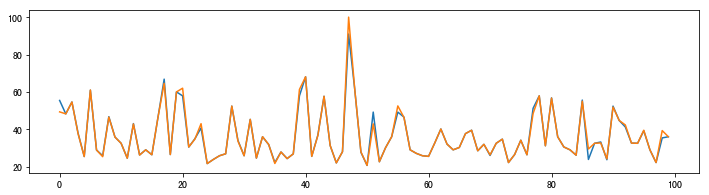

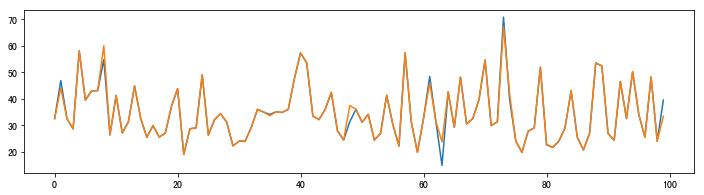

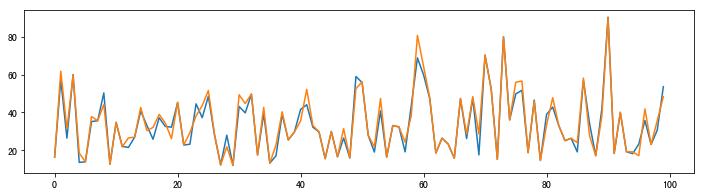

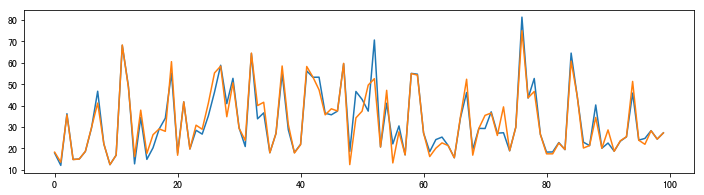

In [13]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=20)
# clf.fit(x_train, y_train)
train('green_tripdata_2020-01.csv', 1, 31, clf, 'clf')
train('green_tripdata_2020-02.csv', 2, 29, clf, 'clf')
train('green_tripdata_2020-03.csv', 3, 31, clf, 'clf')
train('green_tripdata_2020-04.csv', 4, 30, clf, 'clf')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


            time total_amount trip_distance fare_amount extra  temp
0  2020/1/1 0:39        28.83          5.57       25.78  2.75  31.5
1  2020/1/1 0:39        27.12          5.57       26.82     0  31.5
2  2020/1/1 0:45        27.91             7       24.86  2.75  31.5
3  2020/1/1 0:45         17.8             7        17.5     0  31.5
4  2020/1/1 0:32         52.4         20.27       49.35  2.75  31.5
mse:  [4.42509930059512]
mae:  [1.353649943890948]
mape:  [3.3227926015953093]


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                  time total_amount trip_distance fare_amount extra temp
0  2020-02-01 00:29:00         52.4         17.28       49.35  2.75   25
1  2020-02-01 00:27:00         39.5          6.83       36.45  2.75   25
2  2020-02-01 00:21:00        33.06          5.68       23.89  2.75   25
3  2020-02-01 00:40:00        39.67          8.49       33.87   5.5   25
4  2020-02-01 00:19:00        20.99          3.28       17.94  2.75   25
mse:  [4.389405016727468]
mae:  [1.3859711499089251]
mape:  [3.4571340355204176]


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                  time total_amount trip_distance fare_amount extra  temp
0  2020-03-01 00:17:00        26.36          4.09       23.31  2.75  30.1
1  2020-03-01 00:07:00         88.5         36.15       77.04  2.75  30.1
2  2020-03-01 00:05:00        23.57          3.96       20.52  2.75  30.1
3  2020-03-01 00:27:00         22.2          3.97       19.15  2.75  30.1
4  2020-03-01 00:14:00        39.21         12.87       36.16  2.75  30.1
mse:  [7.824931055706115]
mae:  [1.9269865238639674]
mape:  [6.897083773355986]


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                  time total_amount trip_distance fare_amount extra  temp
0  2020-04-01 03:26:00        29.08         10.06       22.66     0  28.8
1  2020-04-01 03:56:00        26.36         10.29       26.06     0  28.8
2  2020-04-01 03:59:00        34.16         14.08       33.86     0  28.8
3  2020-04-01 03:55:00         16.5          6.16        16.2     0  28.8
4  2020-04-01 04:06:00        27.74         11.18       27.44     0  28.8
mse:  [17.878049176305037]
mae:  [2.7675292226169743]
mape:  [7.810809757033509]


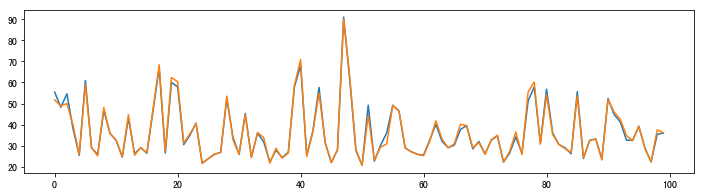

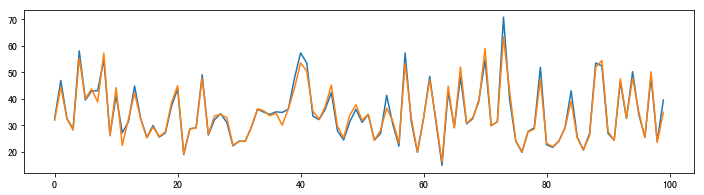

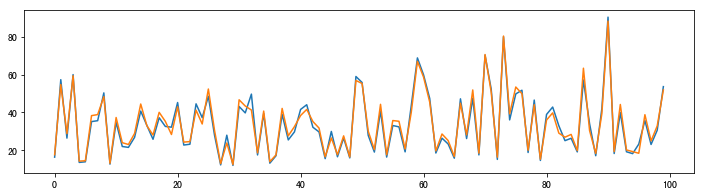

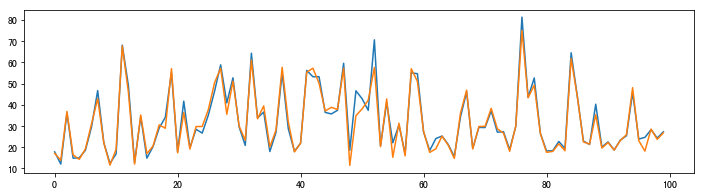

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train('green_tripdata_2020-01.csv', 1, 31, model, 'lr')
train('green_tripdata_2020-02.csv', 2, 29, model, 'lr')
train('green_tripdata_2020-03.csv', 3, 31, model, 'lr')
train('green_tripdata_2020-04.csv', 4, 30, model, 'lr')

In [15]:
(4.42 - 4.24) / 4.24

0.04245283018867917

In [16]:
(3.32 - 1.66) / 1.66

1.0

In [17]:
1.35 - 0.68

0.67